# Image Classification with CIFAR10 : Part 2

Part 2 of the project uses the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) in Tensorflow to perform image classification using CIFAR10. You should complete [Part 1](https://courses.cs.washington.edu/courses/csep576/20sp/projects/Project3_1.html) first. Part 1 is worth 60% and Part 2 worth 40% of the overall mark.

**Getting Started:** The source files for this project are [here](https://courses.cs.washington.edu/courses/csep576/20sp/projects/project3/project3.zip). To run locally, you will need [IPython/Jupyter](http://jupyter.org/install.html) as well as [Tensorflow](https://www.tensorflow.org/install) installed. Launch Jupyter and open `Project3_2.ipynb`. You can also import this notebook directly into [Colaboratory](https://colab.research.google.com/) without installing anything.

**This project:** You'll start by replicating the linear classifier from [Part 1](https://courses.cs.washington.edu/courses/csep576/20sp/projects/Project3_1.html) using the Keras Sequential API. This will give a performance baseline. You'll then work on improved model designs using convolutional layers and tune parameters to get good classification performance.

**What to turn in:** Hand in a zipfile containing your completed .ipynb notebook and any .py files you created. Be sure to describe clearly the results of your investigations.

version `050420`

### Copyright 2020 Google LLC

Licensed under the Apache License, Version 2.0 (the "License"); 
This is not an official Google product.

In [2]:
#@title 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# edit this line to change the figure size
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams['font.size'] = 16
# may be needed to avoid mulitply defined openmp libs
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

### Download CIFAR10 dataset

We use `keras.datasets` to download the CIFAR10 data, splitting off 1000 images from the training set for validation. The dataset will be cached at `~/.keras/datasets` by default.

automobile


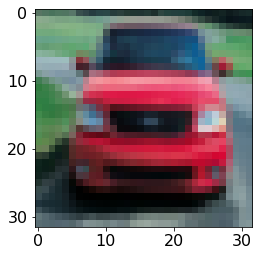

In [4]:
# Load CIFAR10 dataset
(train_images0,train_labels0),(test_images,test_labels) = keras.datasets.cifar10.load_data()

# Normalise images
train_images0=train_images0.astype('float')/255.0
test_images=test_images.astype('float')/255.0

# Create a validation set
num_valid=1000
valid_images=train_images0[0:num_valid]
valid_labels=train_labels0[0:num_valid]
train_images=train_images0[num_valid:]
train_labels=train_labels0[num_valid:]

cifar10_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
num_classes=10
num_train=train_labels.size
num_valid=valid_labels.size
num_test=test_labels.size

# Make one-hot targets
train_one_hot=tf.one_hot(train_labels[:,0],num_classes)
valid_one_hot=tf.one_hot(valid_labels[:,0],num_classes)
test_one_hot=tf.one_hot(test_labels[:,0],num_classes)

# Show a random image and label
rnd=np.random.randint(num_train)
plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(train_images[rnd])
print(cifar10_names[train_labels[rnd][0]])

### Define a Linear model using Keras [10%]

We'll start by replicating the linear model from [Part 1](https://courses.cs.washington.edu/courses/csep576/20sp/projects/Project3_1.html). Use the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to define a linear model over the input pixels. Complete the code below Hint: try `layers.Flatten` and `layers.Dense`. Check that your layer outputs have the right shape. How many parameters does your model have?

#### A: Model has 30730 parameters

In [5]:
# Initialize a Keras sequential model
model=keras.models.Sequential()

#FORNOW: placeholder model, replace this with your own model
#model.add(layers.Conv2D(filters=10,kernel_size=1,input_shape=(32,32,3)))
#model.add(layers.GlobalAveragePooling2D())

"""
*************************************************************
*** TODO: implement a linear model using Keras Sequential API
*************************************************************

The model should compute a single linear function of the input pixels
"""        

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes))


"""
*************************************************************
"""

# output a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


### Train the model

Use the code below to train the model with squared-error loss between logits and targets. Try a few different optimizers and loss functions, and running for additional epochs. Which combination works best? Can you modify the model to implement softmax regression? How could you add regularization (L2 penalty) on the weights?

#### Trying combinations of opt=['sgd', 'adam'] and loss=['mse', 'categorical-crossentropy'] each with epoch=10, with added softmax regression and L2 penalty

#### After running the model configurations below, best performance was found with opt='sgd', loss='categorical-crossentropy'



In [6]:
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

"""
******************************************************************
*** TODO: test different training parameters for linear regression
******************************************************************
"""


"""
******************************************************************
"""

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 54us/sample - loss: 0.1109 - accuracy: 0.2087 - val_loss: 0.1167 - val_accuracy: 0.1870
Epoch 2/10
49000/49000 [==============================] - 2s 45us/sample - loss: 0.0969 - accuracy: 0.2519 - val_loss: 0.0975 - val_accuracy: 0.3000
Epoch 3/10
49000/49000 [==============================] - 3s 63us/sample - loss: 0.0939 - accuracy: 0.2685 - val_loss: 0.1270 - val_accuracy: 0.1650
Epoch 4/10
49000/49000 [==============================] - 2s 43us/sample - loss: 0.0921 - accuracy: 0.2800 - val_loss: 0.1065 - val_accuracy: 0.2260
Epoch 5/10
49000/49000 [==============================] - 2s 45us/sample - loss: 0.0908 - accuracy: 0.2894 - val_loss: 0.1229 - val_accuracy: 0.2350
Epoch 6/10
49000/49000 [==============================] - 2s 44us/sample - loss: 0.0899 - accuracy: 0.2943 - val_loss: 0.0919 - val_accuracy: 0.2860
Epoch 7/10
49000/49000 [==============================] -

'\n******************************************************************\n'

In [7]:
opt = 'sgd'
loss = 'mean_squared_error'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 54us/sample - loss: 0.1078 - accuracy: 0.1779 - val_loss: 0.1052 - val_accuracy: 0.2350
Epoch 2/10
49000/49000 [==============================] - 2s 46us/sample - loss: 0.1035 - accuracy: 0.2507 - val_loss: 0.1018 - val_accuracy: 0.2700
Epoch 3/10
49000/49000 [==============================] - 2s 46us/sample - loss: 0.1007 - accuracy: 0.2810 - val_loss: 0.0993 - val_accuracy: 0.3040
Epoch 4/10
49000/49000 [==============================] - 2s 46us/sample - loss: 0.0986 - accuracy: 0.3030 - val_loss: 0.0974 - val_accuracy: 0.3170
Epoch 5/10
49000/49000 [==============================] - 2s 45us/sample - loss: 0.0969 - accuracy: 0.3188 - val_loss: 0.0957 - val_accuracy: 0.3390
Epoch 6/10
49000/49000 [==============================] - 2s 44us/sample - loss: 0.0954 - accuracy: 0.3285 - val_loss: 0.0943 - val_accuracy: 0.3360
Epoch 7/10
49000/49000 [==============================] -

In [8]:
opt = 'sgd'
loss = 'categorical_crossentropy'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 64us/sample - loss: 1.9709 - accuracy: 0.3034 - val_loss: 1.8902 - val_accuracy: 0.3250
Epoch 2/10
49000/49000 [==============================] - 2s 46us/sample - loss: 1.8630 - accuracy: 0.3547 - val_loss: 2.1561 - val_accuracy: 0.2640
Epoch 3/10
49000/49000 [==============================] - 2s 46us/sample - loss: 1.8399 - accuracy: 0.3637 - val_loss: 2.0146 - val_accuracy: 0.2910
Epoch 4/10
49000/49000 [==============================] - 2s 41us/sample - loss: 1.8260 - accuracy: 0.3706 - val_loss: 1.8350 - val_accuracy: 0.3610
Epoch 5/10
49000/49000 [==============================] - 2s 44us/sample - loss: 1.8123 - accuracy: 0.3768 - val_loss: 2.2824 - val_accuracy: 0.2570
Epoch 6/10
49000/49000 [==============================] - 2s 45us/sample - loss: 1.8035 - accuracy: 0.3787 - val_loss: 1.9706 - val_accuracy: 0.3280
Epoch 7/10
49000/49000 [==============================] -

In [9]:
opt = 'adam'
loss = 'mean_squared_error'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 62us/sample - loss: 0.0935 - accuracy: 0.2605 - val_loss: 0.0875 - val_accuracy: 0.2890
Epoch 2/10
49000/49000 [==============================] - 2s 50us/sample - loss: 0.0869 - accuracy: 0.2992 - val_loss: 0.0828 - val_accuracy: 0.3220
Epoch 3/10
49000/49000 [==============================] - 3s 56us/sample - loss: 0.0885 - accuracy: 0.2902 - val_loss: 0.1019 - val_accuracy: 0.1660
Epoch 4/10
49000/49000 [==============================] - 3s 71us/sample - loss: 0.0871 - accuracy: 0.2948 - val_loss: 0.0830 - val_accuracy: 0.3160
Epoch 5/10
49000/49000 [==============================] - 3s 65us/sample - loss: 0.0873 - accuracy: 0.2991 - val_loss: 0.0903 - val_accuracy: 0.2860
Epoch 6/10
49000/49000 [==============================] - 3s 65us/sample - loss: 0.0865 - accuracy: 0.3043 - val_loss: 0.0841 - val_accuracy: 0.3070
Epoch 7/10
49000/49000 [==============================] -

In [10]:
opt = 'adam'
loss = 'categorical_crossentropy'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 4s 91us/sample - loss: 1.9950 - accuracy: 0.3130 - val_loss: 1.8077 - val_accuracy: 0.3520
Epoch 2/10
49000/49000 [==============================] - 4s 76us/sample - loss: 1.9152 - accuracy: 0.3469 - val_loss: 1.7725 - val_accuracy: 0.3890
Epoch 3/10
49000/49000 [==============================] - 4s 75us/sample - loss: 1.8919 - accuracy: 0.3582 - val_loss: 1.8803 - val_accuracy: 0.3530
Epoch 4/10
49000/49000 [==============================] - 4s 86us/sample - loss: 1.8871 - accuracy: 0.3617 - val_loss: 1.7807 - val_accuracy: 0.3940
Epoch 5/10
49000/49000 [==============================] - 4s 87us/sample - loss: 1.8693 - accuracy: 0.3706 - val_loss: 1.9027 - val_accuracy: 0.3610
Epoch 6/10
49000/49000 [==============================] - 4s 83us/sample - loss: 1.8593 - accuracy: 0.3730 - val_loss: 1.8372 - val_accuracy: 0.3660
Epoch 7/10
49000/49000 [==============================] -

Reintialize the model with opt='sgd', loss='categorical_crossentropy'

In [11]:
opt = 'sgd'
loss = 'categorical_crossentropy'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 4s 88us/sample - loss: 1.9699 - accuracy: 0.3011 - val_loss: 2.2562 - val_accuracy: 0.2360
Epoch 2/10
49000/49000 [==============================] - 4s 79us/sample - loss: 1.8673 - accuracy: 0.3531 - val_loss: 2.0065 - val_accuracy: 0.3170
Epoch 3/10
49000/49000 [==============================] - 4s 73us/sample - loss: 1.8410 - accuracy: 0.3642 - val_loss: 1.9119 - val_accuracy: 0.3360
Epoch 4/10
49000/49000 [==============================] - 4s 74us/sample - loss: 1.8241 - accuracy: 0.3707 - val_loss: 2.0748 - val_accuracy: 0.2580
Epoch 5/10
49000/49000 [==============================] - 3s 66us/sample - loss: 1.8110 - accuracy: 0.3769 - val_loss: 1.9110 - val_accuracy: 0.3220
Epoch 6/10
49000/49000 [==============================] - 3s 67us/sample - loss: 1.8046 - accuracy: 0.3793 - val_loss: 1.9402 - val_accuracy: 0.3350
Epoch 7/10
49000/49000 [==============================] -

### Run the model

The following code demonstrates use of `model.predict`. Run the following code to demonstrate running the model on a single input.

predicted = truck
actual = truck


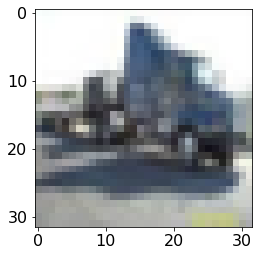

In [12]:
rnd=np.random.randint(num_test)
test_image_rnd=test_images[rnd]
test_label_rnd=test_labels[rnd][0]
logits=model.predict(np.expand_dims(test_image_rnd,0))
label_pred=np.argmax(logits)
plt.imshow(test_image_rnd)
print('predicted =',cifar10_names[label_pred])
print('actual =',cifar10_names[test_label_rnd])

### Design a new model [5%]

Design your own convolutional net choosing your own set of layers. In the next block, you'll train, tune and visualize outputs from this model.

In [13]:
"""
****************************************************
*** TODO: design a convolutional network for CIFAR10
****************************************************

Design a model to perform CIFAR10 classification
"""     

model=keras.models.Sequential()
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

"""
****************************************************
"""

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                250890    
Total params: 271,146
Trainable params: 271,146
Non-trainable params: 0
_________________________________________________________________


'\n****************************************************\n'

### Train, Tune and Visualize the Model [25%]

Train your model and plot training and validation accuracy as a function of time (steps or epochs). Choose some model parameters (e.g., number of layers, filters per layer, kernel size) and study the affect of their settings on performance. Show your findings with plots or tables with validation accuracy as a function of the parameters in your study. Visualize some aspect of your model, e.g., first layer weights, activation distributions. How do they evolve over time?

Train on 49000 samples, validate on 1000 samples
Epoch 1/5
49000/49000 [==============================] - 128s 3ms/sample - loss: 1.7969 - accuracy: 0.3638 - val_loss: 1.6626 - val_accuracy: 0.4260
Epoch 2/5
49000/49000 [==============================] - 140s 3ms/sample - loss: 1.4989 - accuracy: 0.4702 - val_loss: 1.4553 - val_accuracy: 0.4630
Epoch 3/5
49000/49000 [==============================] - 145s 3ms/sample - loss: 1.3457 - accuracy: 0.5256 - val_loss: 1.2910 - val_accuracy: 0.5560
Epoch 4/5
49000/49000 [==============================] - 136s 3ms/sample - loss: 1.2482 - accuracy: 0.5607 - val_loss: 1.2857 - val_accuracy: 0.5340
Epoch 5/5
49000/49000 [==============================] - 137s 3ms/sample - loss: 1.1784 - accuracy: 0.5887 - val_loss: 1.2553 - val_accuracy: 0.5460


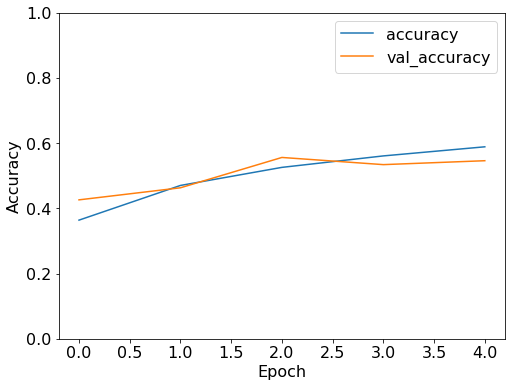

In [14]:
# FORNOW: train model with sgd for 5 epochs
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_one_hot, epochs=5, validation_data=(valid_images, valid_one_hot))

"""
*********************************************
*** TODO: train, tune and visualize CNN model
*********************************************
"""    


"""
*********************************************
"""

# Example of plotting training and validation accuracy vs epoch
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

### Testing the model by varying kernel size in [3, 5, 7, 9]

Train on 49000 samples, validate on 1000 samples
Epoch 1/5
49000/49000 [==============================] - 113s 2ms/sample - loss: 1.8074 - accuracy: 0.3584 - val_loss: 1.5720 - val_accuracy: 0.4310
Epoch 2/5
49000/49000 [==============================] - 139s 3ms/sample - loss: 1.4736 - accuracy: 0.4777 - val_loss: 1.3897 - val_accuracy: 0.4950
Epoch 3/5
49000/49000 [==============================] - 127s 3ms/sample - loss: 1.3353 - accuracy: 0.5297 - val_loss: 1.4303 - val_accuracy: 0.4970
Epoch 4/5
49000/49000 [==============================] - 126s 3ms/sample - loss: 1.2578 - accuracy: 0.5574 - val_loss: 1.2619 - val_accuracy: 0.5370
Epoch 5/5
49000/49000 [==============================] - 131s 3ms/sample - loss: 1.1930 - accuracy: 0.5827 - val_loss: 1.3426 - val_accuracy: 0.5010
Train on 49000 samples, validate on 1000 samples
Epoch 1/5
49000/49000 [==============================] - 200s 4ms/sample - loss: 1.7760 - accuracy: 0.3654 - val_loss: 1.7055 - val_accuracy: 0.3730
Epoch 2/

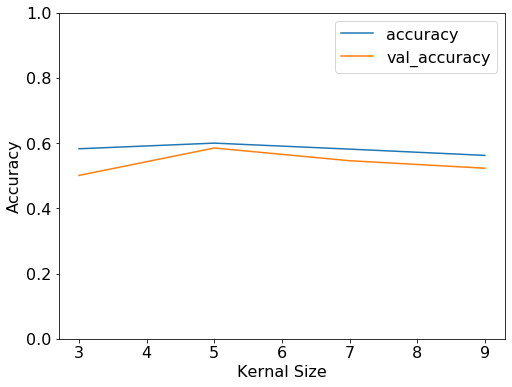

In [20]:
kernal_size = [3, 5, 7, 9]
acc_seq=[]
val_acc_seq=[]

for k in kernal_size:
    model=keras.models.Sequential()
    model.add(layers.Conv2D(64, kernel_size=k, activation='relu', input_shape=(32,32,3)))
    model.add(layers.Conv2D(32, kernel_size=k, activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(train_images, train_one_hot, epochs=5, validation_data=(valid_images, valid_one_hot))
    
    acc_seq.append(history.history['accuracy'][-1])
    val_acc_seq.append(history.history['val_accuracy'][-1])
    
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(kernal_size, acc_seq, label='accuracy')
plt.plot(kernal_size, val_acc_seq, label = 'val_accuracy')
plt.xlabel('Kernal Size')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

Accuracy peaks with a kernal size of 5, will use this as final parameter

### Visualize first and second layer activation

In [21]:
model=keras.models.Sequential()
model.add(layers.Conv2D(64, kernel_size=5, activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, kernel_size=5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_one_hot, epochs=5, validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/5
49000/49000 [==============================] - 204s 4ms/sample - loss: 1.7630 - accuracy: 0.3700 - val_loss: 2.1108 - val_accuracy: 0.3560
Epoch 2/5
49000/49000 [==============================] - 190s 4ms/sample - loss: 1.4292 - accuracy: 0.4940 - val_loss: 1.4139 - val_accuracy: 0.5110
Epoch 3/5
49000/49000 [==============================] - 198s 4ms/sample - loss: 1.3175 - accuracy: 0.5322 - val_loss: 1.2781 - val_accuracy: 0.5370
Epoch 4/5
49000/49000 [==============================] - 197s 4ms/sample - loss: 1.2409 - accuracy: 0.5627 - val_loss: 1.5451 - val_accuracy: 0.4680
Epoch 5/5
49000/49000 [==============================] - 208s 4ms/sample - loss: 1.1784 - accuracy: 0.5877 - val_loss: 1.2029 - val_accuracy: 0.5890


In [25]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:2]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(valid_images)

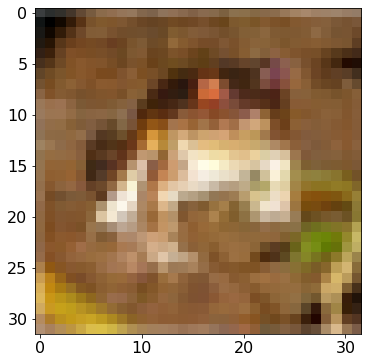

In [32]:
plt.imshow(valid_images[0])

C:\Users\cofowle\anaconda3\envs\ImageFeatureExtractionAndMatching\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


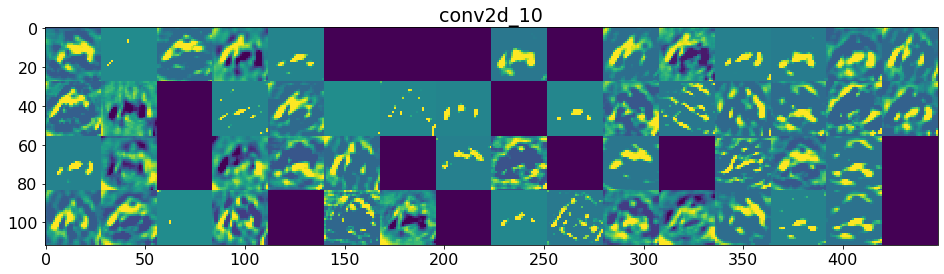

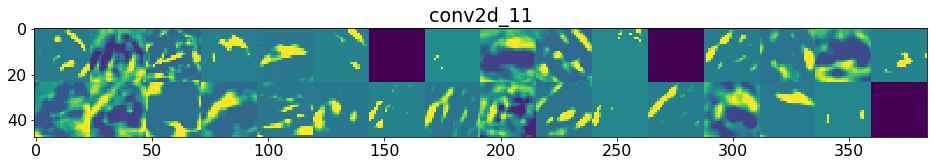

In [29]:
layer_names = []
for layer in model.layers[:2]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

The first layer somewhat retains the shape of the original image displayed above. In the second layer the visualizations become less recognizable

### Evaluate the model

Use the code below to compute the final accuracy of your model on the test set.

In [33]:
# Compute accuracy on the test set
test_loss, test_acc = model.evaluate(test_images,test_one_hot,verbose=2)

10000/10000 - 5s - loss: 1.2300 - accuracy: 0.5649


Final accuracy with the CNN architecture and kernal_size=5 is 56.5%